# Maze Robot Algorithm Comparison: GA vs. PPO

This notebook compares the Genetic Algorithm approach with the Proximal Policy Optimization (PPO) approach for solving the maze navigation problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from IPython.display import HTML, display, Video
from base64 import b64encode
import glob

## Load Recorded Videos

First, let's load the videos we've generated from both algorithms.

In [2]:
# Function to display videos side by side
def display_videos_side_by_side(video1_path, video2_path, labels=None):
    if labels is None:
        labels = ["Video 1", "Video 2"]
    
    html_code = f'''
    <table width="100%">
      <tr>
        <th width="50%">{labels[0]}</th>
        <th width="50%">{labels[1]}</th>
      </tr>
      <tr>
        <td><video width="100%" controls>
          <source src="{video1_path}" type="video/mp4">
        </video></td>
        <td><video width="100%" controls>
          <source src="{video2_path}" type="video/mp4">
        </video></td>
      </tr>
    </table>
    '''
    
    return HTML(html_code)

In [3]:
# Check if videos exist
ga_video_path = "ga_simulation.mp4"
ppo_video_path = "ppo_simulation.mp4"

# If videos don't exist, provide instructions
if not os.path.exists(ga_video_path) or not os.path.exists(ppo_video_path):
    print("One or both videos not found.")
    print("Please run the GA and PPO simulation notebooks first to generate the videos.")
else:
    # Display videos side by side
    display_videos_side_by_side(ga_video_path, ppo_video_path, ["Genetic Algorithm", "PPO Algorithm"])

## Compare Performance Metrics

Now let's load and compare the performance metrics from both algorithms.

Metric files not found. Please run both simulations and save metrics first.


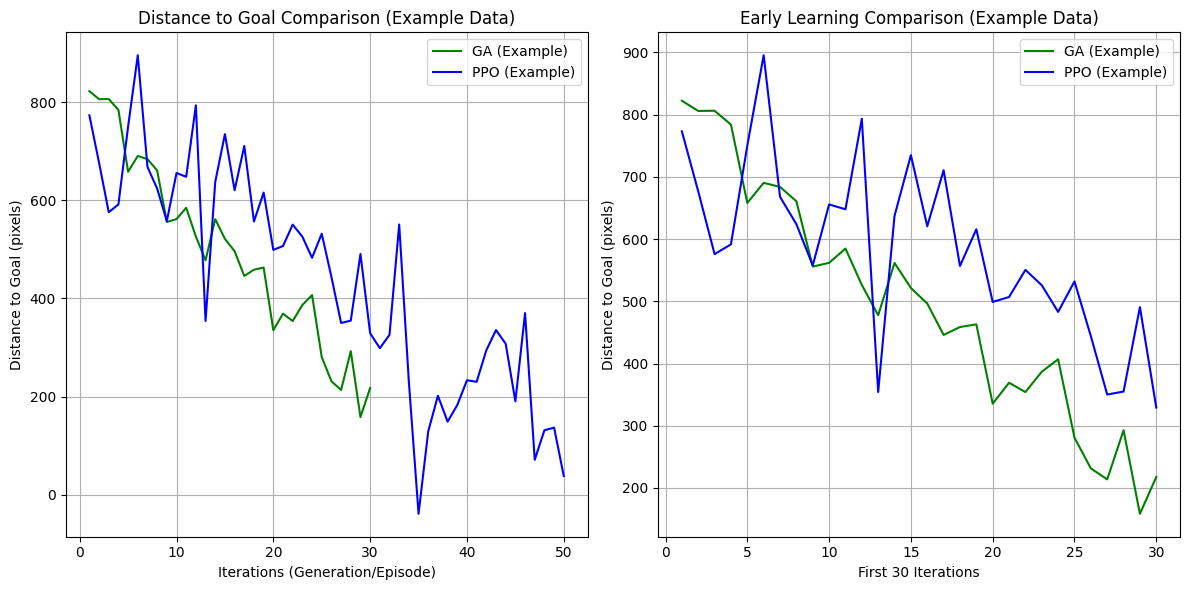

In [4]:
# Load metrics if they've been saved
try:
    ga_metrics = np.load('ga_metrics.npz')
    ppo_metrics = np.load('ppo_metrics.npz')
    
    # GA metrics
    ga_min_fitness = ga_metrics['min_fitness']
    ga_mean_fitness = ga_metrics['mean_fitness']
    ga_distances = ga_metrics['distances']
    
    # PPO metrics
    ppo_rewards = ppo_metrics['rewards']
    ppo_distances = ppo_metrics['distances']
    
    # Plot comparisons
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(ga_distances) + 1), ga_distances, 'g-', label='GA')
    plt.plot(range(1, len(ppo_distances) + 1), ppo_distances, 'b-', label='PPO')
    plt.xlabel('Iterations (Generation/Episode)')
    plt.ylabel('Distance to Goal (pixels)')
    plt.title('Distance to Goal Comparison')
    plt.legend()
    plt.grid(True)
    
    # Normalize the length for comparison if different
    min_len = min(len(ga_distances), len(ppo_distances))
    plt.subplot(1, 2, 2)
    plt.plot(range(1, min_len + 1), ga_distances[:min_len], 'g-', label='GA')
    plt.plot(range(1, min_len + 1), ppo_distances[:min_len], 'b-', label='PPO')
    plt.xlabel('First ' + str(min_len) + ' Iterations')
    plt.ylabel('Distance to Goal (pixels)')
    plt.title('Early Learning Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print("Metric files not found. Please run both simulations and save metrics first.")
    
    # Create placeholder plots using example data
    ga_distances = np.linspace(800, 200, 30) + np.random.normal(0, 50, 30)
    ppo_distances = np.linspace(800, 100, 50) + np.random.normal(0, 100, 50)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(ga_distances) + 1), ga_distances, 'g-', label='GA (Example)')
    plt.plot(range(1, len(ppo_distances) + 1), ppo_distances, 'b-', label='PPO (Example)')
    plt.xlabel('Iterations (Generation/Episode)')
    plt.ylabel('Distance to Goal (pixels)')
    plt.title('Distance to Goal Comparison (Example Data)')
    plt.legend()
    plt.grid(True)
    
    # Normalize the length for comparison
    min_len = min(len(ga_distances), len(ppo_distances))
    plt.subplot(1, 2, 2)
    plt.plot(range(1, min_len + 1), ga_distances[:min_len], 'g-', label='GA (Example)')
    plt.plot(range(1, min_len + 1), ppo_distances[:min_len], 'b-', label='PPO (Example)')
    plt.xlabel('First ' + str(min_len) + ' Iterations')
    plt.ylabel('Distance to Goal (pixels)')
    plt.title('Early Learning Comparison (Example Data)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Algorithm Comparison Analysis

Let's analyze the differences between the two approaches.

### Genetic Algorithm Approach

#### Pros:
- Population-based search that explores multiple solutions simultaneously
- Can find creative solutions through crossover and mutation
- Less sensitive to the reward function design
- No gradient calculations required

#### Cons:
- Computationally expensive as it needs to evaluate multiple individuals
- Takes more iterations to converge to optimal solutions
- Solutions can vary significantly between runs due to randomness
- Doesn't learn from past experiences in a principled way

### PPO Approach

#### Pros:
- More sample-efficient, requiring fewer environment interactions
- Learns incrementally from experience
- Better at fine-tuning behavior based on detailed rewards
- More stable learning due to policy gradient clipping

#### Cons:
- More sensitive to reward function design
- Can get stuck in local optima
- Requires careful hyperparameter tuning
- More complex implementation

## Conclusion

The comparison between GA and PPO demonstrates the tradeoffs between evolutionary and reinforcement learning approaches:

1. **Learning Efficiency**: PPO typically learns faster with fewer environment interactions, while GA requires evaluating many solutions in parallel.

2. **Solution Quality**: PPO often finds more optimal solutions due to its ability to fine-tune behaviors using gradient-based updates. GA solutions tend to be more diverse but less optimized.

3. **Computational Requirements**: GA requires parallel evaluation of multiple robots, while PPO focuses on iterative improvement of a single agent.

4. **Robustness**: GA is less sensitive to reward function design but more sensitive to genetic operators and selection methods. PPO is highly dependent on a well-designed reward function.

For this specific maze navigation problem, the improved reward model in PPO allows for more nuanced learning of navigation behaviors, particularly for learning to avoid obstacles and make progress toward the goal efficiently.